# Part 3 : Restoration

In this part of the TP, we are going to look at image restoration. We will look at several type of noise and ways to remove this noise. We first define some helper functions.

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color

is_colab = True

def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    plt.figure(figsize=(10, 10))
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return


--2021-11-28 20:56:21--  https://perso.telecom-paristech.fr/anewson/doc/images/palma.png
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 770583 (753K) [image/png]
Saving to: ‘palma.png’

palma.png           100%[===================>] 752.52K   713KB/s    in 1.1s    

2021-11-28 20:56:24 (713 KB/s) - ‘palma.png’ saved [770583/770583]



(600, 800)

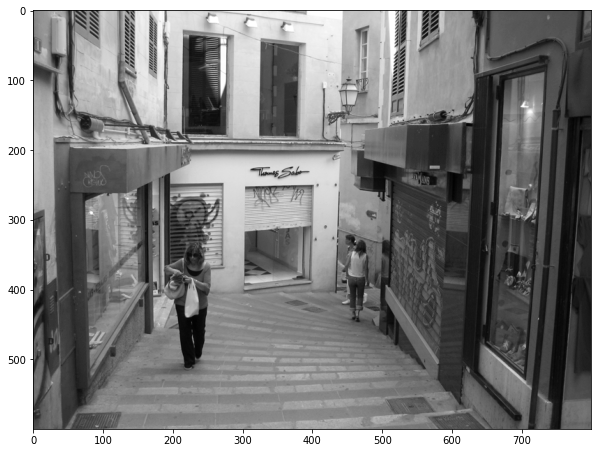

In [2]:

file_dir = 'images/'
file_name = 'palma'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/palma.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

We will look at the following noise types :

- Gaussian noise
- Impulse (salt-and-pepper) noise
- Missing pixels

Fill in the following functions to add this noise to a gray-level image. Do not forget to clip the pixe values to the range $(0,1)$.

In [9]:

def add_gaussian_noise(img_in,sigma_noise = 0.01):

  #INSERT CODE HERE
  normal_distribution = sigma_noise * np.random.normal(0,1,img_in.shape)
  img_out = np.clip(img_in + normal_distribution, 0, 1)
  return img_out


def add_impulse_noise(img_in,p=0.9):
  #INSERT CODE HERE
    fact = 0.004
    img_out = np.copy(img_in)
    SALT = int(np.ceil(fact * img_in.size * p))
    PEPPER = int(np.ceil((1-fact) * img_in.size * (1 - p)))
    index_1 = tuple([np.random.randint(0, i - 1, SALT) for i in img_in.shape])
    index_0 = tuple([np.random.randint(0, i - 1, PEPPER) for i in img_in.shape])
    img_out[index_1],img_out[index_0] = 1,0
    return img_out

def add_impulse_noise(img_in,p=0.9):
  #INSERT CODE HERE
  ind = np.random.binomial(1, p, img_in.shape)
  img_out = ind*img_in + (1-ind)*np.random.binomial(1, 0.5, img_in.shape)
  return img_out


def add_missing_pixels_noise(img_in,p=0.9):
  #INSERT CODE HERE
    binomial_distribution = np.random.binomial(1,p,img_in.shape) 
    img_out = img_in * binomial_distribution
    return img_out

Add the different noises to the input image, and display (or write) the results. Use the following parameters :

- sigma_noise=0.05 for the gaussian noise
- $p=0.9$ (the probability of a pixel __not__ being affected, for the impulse noise and missing pixels

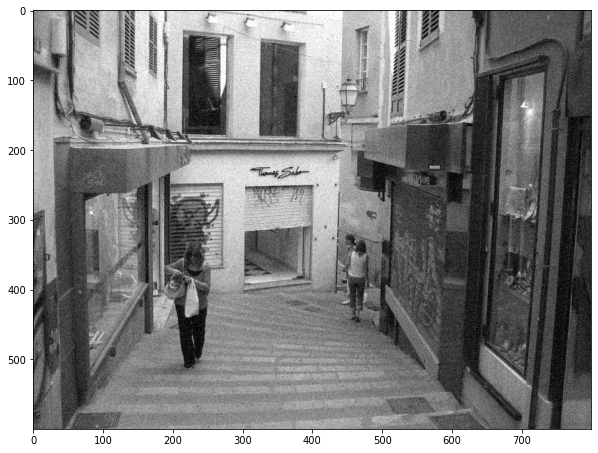

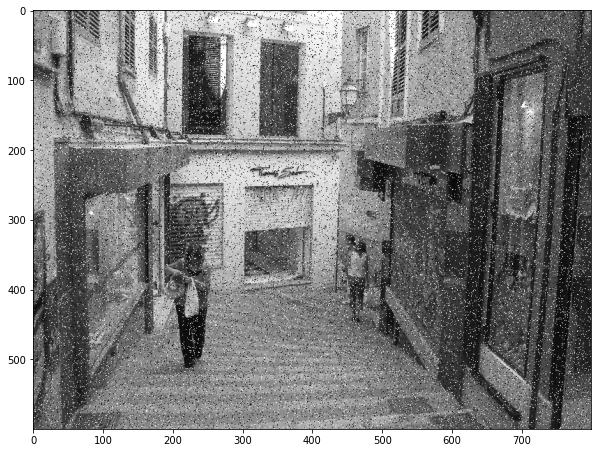

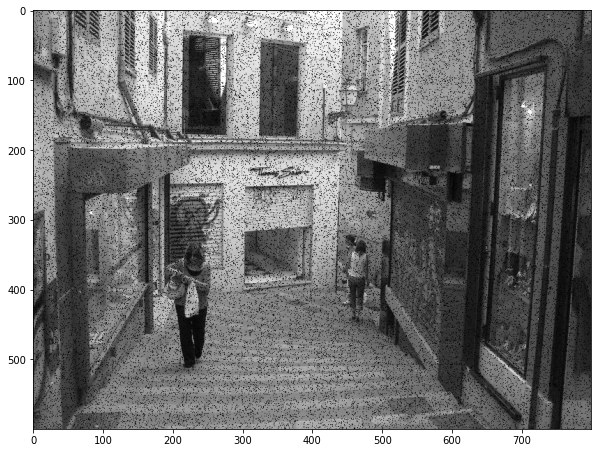

In [10]:
sigma_noise = 0.05
#INSERT CODE HERE
img_gray_gaussian = add_gaussian_noise(img_gray, sigma_noise)
write_image(img_gray_gaussian,file_name+'_gaussian_noise.png')
display_image(img_gray_gaussian)

#INSERT CODE HERE
img_gray_impulse = add_impulse_noise(img_gray, 0.9)
write_image(img_gray_impulse,file_name+'_impulse_noise.png')
display_image(img_gray_impulse)

#INSERT CODE HERE
img_gray_missing = add_missing_pixels_noise(img_gray, 0.9)
write_image(img_gray_missing,file_name+'_missing_pixels.png')
display_image(img_gray_missing)

__Question 3.1__ For each type of noise, propose a restoration filter (see course slides) 

__Answer__:  We could use a smoothing filter to restore gaussian noise and the median filter for the other kinds of noise.

Implement these restoration techniques in appropriately named functions, and write the corresponding output images. Try to find the parameters which give the best results (visually).

__Note__, you can use the filtering functions of the ``scipy.ndimage`` package, where the filtering is already implemented

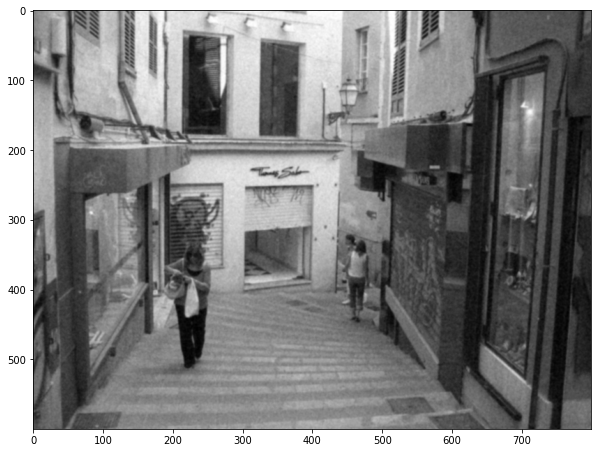

In [13]:
from scipy import ndimage

def gaussian_filter(img,sigma = 3):
  #INSERT CODE HERE
  img_out = ndimage.gaussian_filter(img,sigma)
  return img_out

sigma_gauss = 1
img_out_gaussian = gaussian_filter(img_gray_gaussian,sigma_gauss)
write_image(img_out_gaussian,file_name+'_denoised_gaussian.png')
display_image(img_out_gaussian)

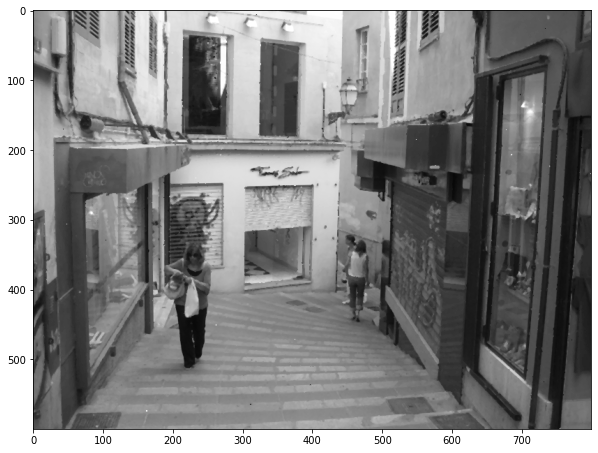

In [16]:
def median_filter(img,median_size):
  #INSERT CODE HERE
  img_out = ndimage.median_filter(img , size = median_size)
  return img_out

median_size = 3
img_out_impulse_median = median_filter(img_gray_impulse,median_size)
write_image(img_out_impulse_median,file_name+'_impulse_denoised_median.png')
display_image(img_out_impulse_median)


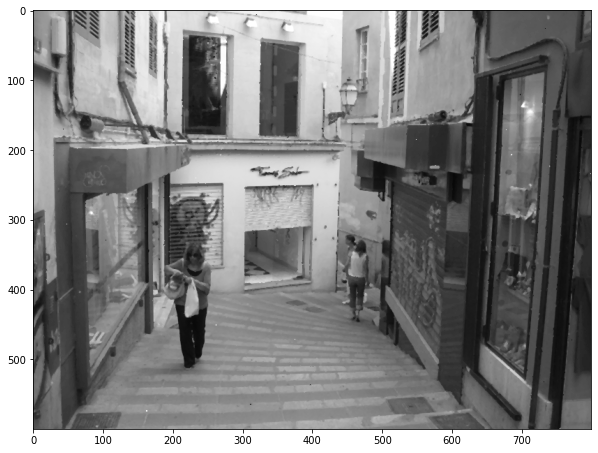

In [17]:

img_out_missing_median = median_filter(img_gray_missing,median_size)
write_image(img_out_missing_median,file_name+'_missing_denoised_median.png')
display_image(img_out_impulse_median)

__Question 3.2__ Roughly speaking, what is the tradeoff which you are trying to achieve by tuning the parameters ?

__Answer__  We should pay attention to the fact that we want to have an image with a high visual quality similar to the original image and also keep a small difference with the original image that we want to filter in order to reduce the noise.

### Evaluation

A commonly used metric for denoising is the ''Peak Signal-to-Noise Ratio'' (PSNR). This is linked to the commonly known mean squared error. The mean squared error is defined, for a reference image $Y$ and a restored image $Y$, of size $m \times n$ as :

- MSE$(Y,I) = \frac{1}{mn} \sum_{x,y} \left( I_{x,y} - Y_{x,y}\right)^2 $

The PSNR is defined, in Decibels, as :

PSNR$(Y,I) = 10 * \log{\left( \frac{I_{max}^2}{MSE(Y,I)} \right)}$,

where $I_{max}$ is the maximum value of the image. For us (normalised to 1), this gives :

PSNR$(Y,I) = -10 * \log{ \left({MSE(Y,I)} \right)}$.

Implement this in a function, and create a code to plot the PSNR for several values of the paramter, __in the Gaussian case only__. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0.5, 1.0, 'PSNR Plot')

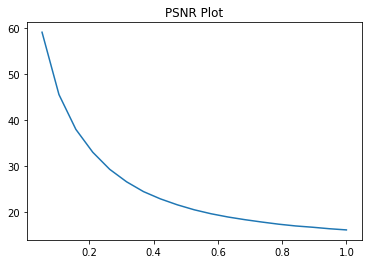

In [18]:
from math import log10
def PSNR(img,img_ref):
    #INSERT CODE HERE
    MSE = np.mean((img - img_ref) ** 2)
    psnr = -10 * np.log(MSE)
    return psnr

#INSERT CODE HERE
# img_noised = img_gray_gaussian
# sigma_list = np.arange(0.1,100,5)
sigma_list = np.linspace(0,1,20)
psnr = []
for sigma in sigma_list:
    noisy_gauss_img=add_gaussian_noise(img_gray, sigma)
    psnr.append(PSNR(img_gray,noisy_gauss_img))
    
plt.plot(sigma_list ,psnr)
plt.title('PSNR Plot')

# display_image(gaussian_filter(img_noised,sigma=1))

## Deconvolution

In this part of the TP, we are going to try and invert a convolution operation. This is called __deconvolution__, and can be carried out in the Fourier domain, as follows. For an image $I$, filter $f$ and an output $Y$, if we have :

$Y = I \ast f$,

then using the convolution theorem (see lesson), we have :

$I = \text{IFFT}\left(\frac{\hat{Y}}{\hat{f}}\right)$

where $\hat{Y}$ and $\hat{f}$ are the Fourier transforms of $Y$ and $f$ respectively.

To simplify the problem, we take a square image for this part of the TP.


--2021-11-28 21:03:20--  https://perso.telecom-paristech.fr/anewson/doc/images/boston.png
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 626414 (612K) [image/png]
Saving to: ‘boston.png’

boston.png          100%[===================>] 611.73K   581KB/s    in 1.1s    

2021-11-28 21:03:22 (581 KB/s) - ‘boston.png’ saved [626414/626414]



(600, 600)

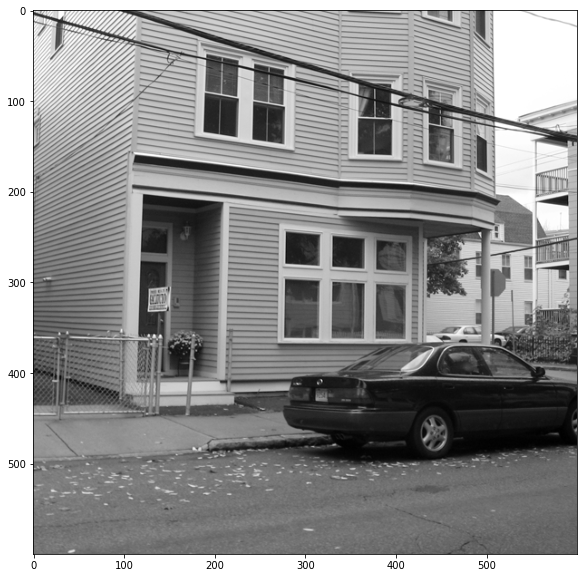

In [19]:
file_dir = 'images/'
file_name = 'boston'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/boston.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)
img_gray.shape

display_image(img_gray)
img_gray.shape

Now, let us consider the following fiter, defined in the Fourier domain :

(600, 600)


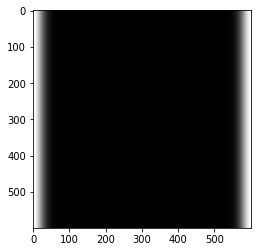

In [20]:
from scipy import signal

img_size = img_gray.shape[0]
h_size = int(np.floor(img_size/2.0))
f_hat = np.zeros((img_size,img_size))

X = np.asarray(range(-h_size,h_size))
f_hat = np.tile( np.expand_dims( np.exp(-( X**2) / (2.0*(20.0**2))) , axis=1), (1,img_size)).T
f_hat /= f_hat.sum()
f_hat = np.fft.ifftshift(f_hat)

plt.imshow( np.log( np.abs(f_hat)+1), cmap = 'gray')

print(f_hat.shape)

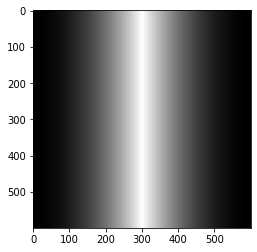

In [21]:
plt.imshow( np.abs(np.log(f_hat)+1), cmap = 'gray')

Using the convolution theorem and the inverse Fourier transform, carry out the convolution of the input image with $f$ and write the result ``img_convolved`` to an output file


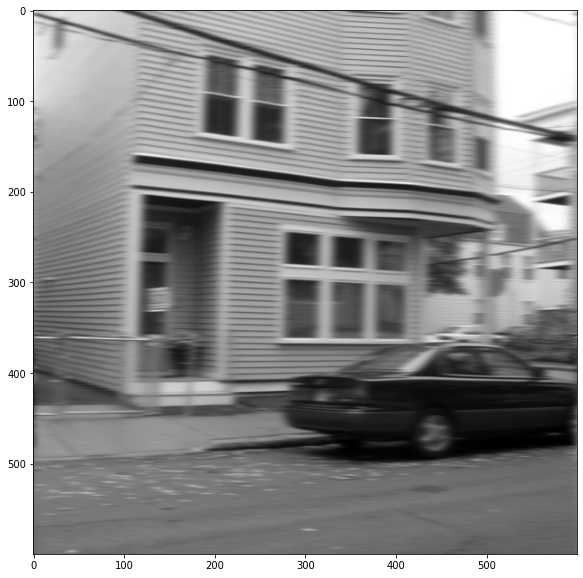

In [22]:
#INSERT CODE HERE
img_convolved = np.fft.fft2(img_gray)*f_hat
img_convolved = np.fft.ifft2(img_convolved)
img_convolved = np.real(img_convolved)
img_convolved -= np.min(img_convolved)
img_convolved /= np.max(img_convolved)

display_image(img_convolved)
write_image(img_convolved,file_name+'_convolved.png')

__Question 3.3__ What does this filter do (you can use the visualisation method from the first part of the TP to see what the filter spectrum looks like) ? How can this happen in real life ? 

__Answer__ 

This filter is a low pass gaussian filter (blurr filter). This can happen in real life in two cases if the camera is moving in one direction (x direction) and also if there is motion which causes blurr.

Now, create a function which carries out a deconvolution in the Fourier domain, given an image and the Fourier transform of the filter $\hat{f}$. You can reuse the code in the first part of the TP. Carry out the deconvolution on ``img_convolved`` and write the result to an output file. Remember to renormalise the output image.

__Important note__ : You will have a problem with very small values of $\hat{f}$ (division by 0). Propose a simple method to address this issue (look at the formula at the beginning of this section on deconvolution).


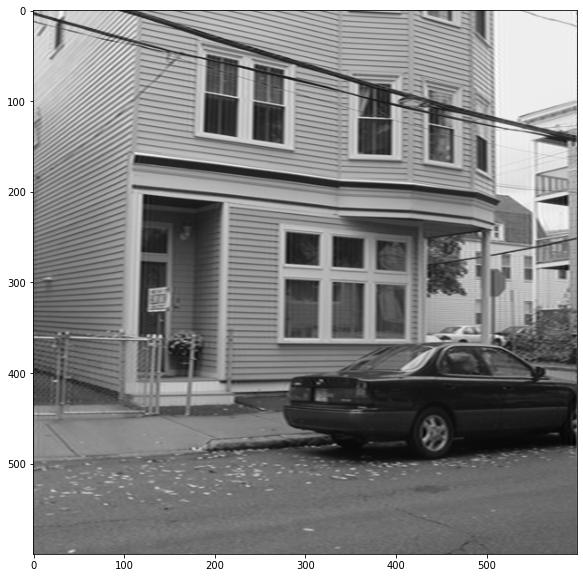

In [23]:
def deconvolve_fourier(img,f_hat):
    #INSERT CODE HERE
    eps=1e-10
    spectrum=np.fft.fft2(img)
    img_out = np.fft.ifft2(spectrum/(f_hat+eps))
    return img_out

img_out = np.real(deconvolve_fourier(img_convolved,f_hat))

display_image(img_out)
img_out -= img_out.min()
img_out /= img_out.max()
write_image(img_out,file_name+'_deconvolved.png')